In [92]:
import arviz as az
import os.path as op
from risk_experiment.cogmodels.fit_model import get_data, build_model
from risk_experiment.cogmodels.utils import plot_ppc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.25, palette='tab10')

In [93]:
session = '7t2'
bids_folder = '/data/ds-risk'
model_label = '1'
roi = None

idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'ses-{session}_model-1_trace.netcdf'))
df = get_data(model_label, session, bids_folder, roi=roi)
model = build_model(model_label, df, roi=roi)
model.build_estimation_model()

100%|██████████| 30/30 [00:03<00:00,  9.29it/s]


In [94]:
ppc = model.ppc(trace=idata.sel(draw=slice(None, None, 10)), data=df)

# "Chose risky" vs "chose 2nd option coding"
ppc.loc[ppc.index.get_level_values('risky_first')] = 1 - ppc.loc[ppc.index.get_level_values('risky_first')]

# plot_ppcs(model_label, ppc, df, bids_folder, session, col_wrap, group_only)


In [95]:
# subject = '16'
def plot_subject(subject, panel_size=3):
    subject = str(subject)

    target_dir = op.join(bids_folder, 'derivatives', 'figures', 'example_subjects')
    if not op.exists(target_dir):
        os.makedirs(target_dir)

    p = ppc.xs(subject, 0, 'subject', drop_level=False)

    fac = plot_ppc(df, p, 2,var_name='ll_bernoulli', col_wrap=1)
    fac.set_titles('')
    fac.savefig(op.join(target_dir, f'sub-{subject}_ppc.pdf'), bbox_inches='tight')

    pars = []

    par_labels = ['n1_evidence_sd', 'n2_evidence_sd', 'risky_prior_mu', 'risky_prior_std', 'safe_prior_mu', 'safe_prior_std']

    for key in par_labels:
        pars.append(idata.posterior[key].to_dataframe().xs(int(subject), 0, 'subject'))

    pars = pd.concat(pars, axis=1)

    fig = plt.figure()
    sns.kdeplot(pars['n1_evidence_sd'], fill=True, color=sns.color_palette()[4], label=1)
    sns.kdeplot(pars['n2_evidence_sd'], fill=True, color=sns.color_palette()[5], label=2)
    sns.despine()
    fig.set_size_inches(panel_size,panel_size)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.yticks([])
    plt.title('Evidence sd')
    plt.legend(title='Option')
    plt.savefig(op.join(target_dir, f'sub-{subject}_evidence_sd.pdf'), bbox_inches='tight')

    palette = sns.color_palette('coolwarm', 4)
    palette = [palette[ix] for ix in [0, 3]]

    fig = plt.figure()
    sns.kdeplot(pars['safe_prior_mu'], fill=True, color=palette[0], label='Safe')
    sns.kdeplot(pars['risky_prior_mu'], fill=True, color=palette[1], label='Risky')
    sns.despine()
    fig.set_size_inches(panel_size,panel_size)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.yticks([])
    plt.xlabel(None)
    plt.title('Prior mu')
    plt.legend(title='Option')
    plt.savefig(op.join(target_dir, f'sub-{subject}_prior_mu.pdf'), bbox_inches='tight')

    fig = plt.figure()
    sns.kdeplot(pars['safe_prior_std'], fill=True, color=palette[0], label='Safe')
    sns.kdeplot(pars['risky_prior_std'], fill=True, color=palette[1], label='Risky')
    sns.despine()
    fig.set_size_inches(panel_size,panel_size)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.yticks([])
    plt.title('Prior std')
    plt.legend(title='Option')
    plt.savefig(op.join(target_dir, f'sub-{subject}_prior_sd.pdf'), bbox_inches='tight')

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


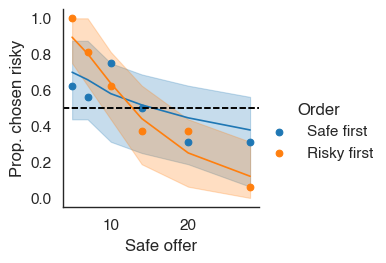

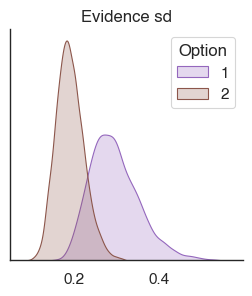

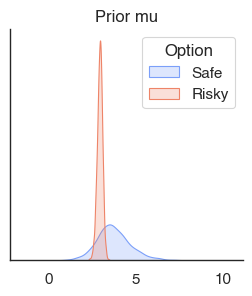

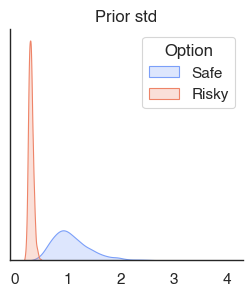

In [96]:
plot_subject('31')

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


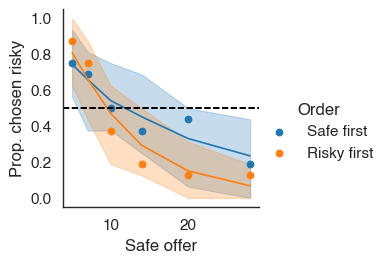

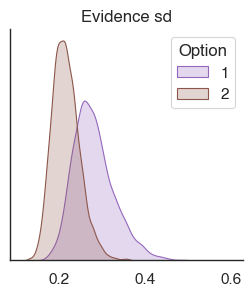

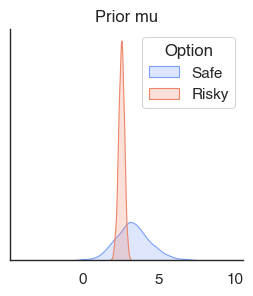

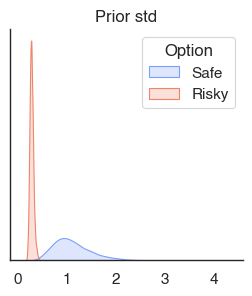

In [97]:
plot_subject('11')

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


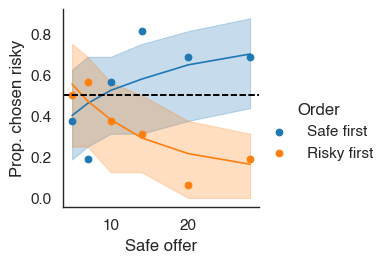

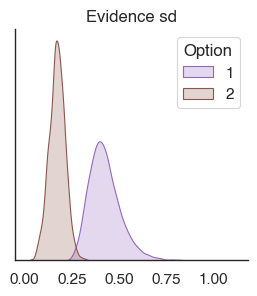

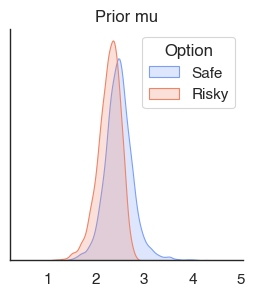

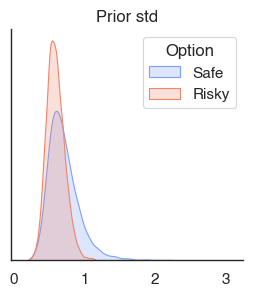

In [104]:
plot_subject(22)

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


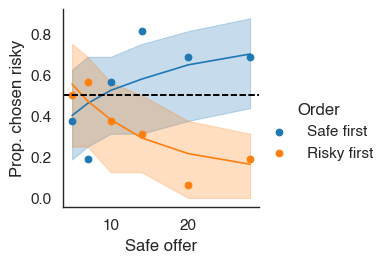

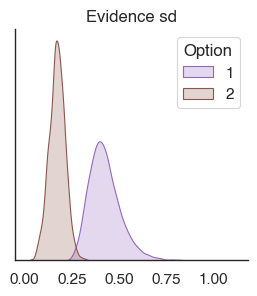

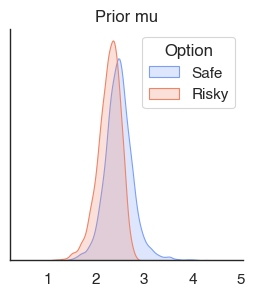

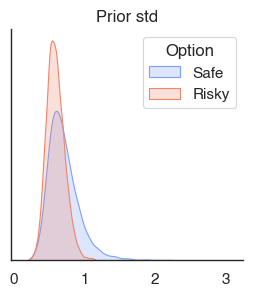

In [99]:
plot_subject(22)

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


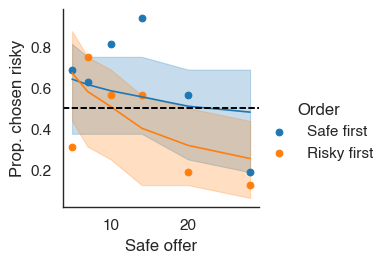

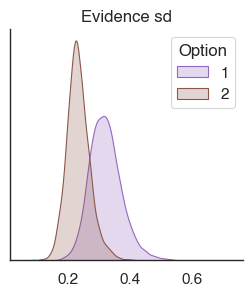

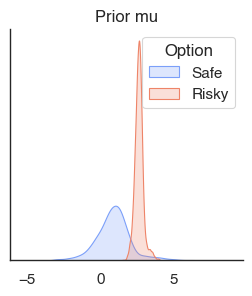

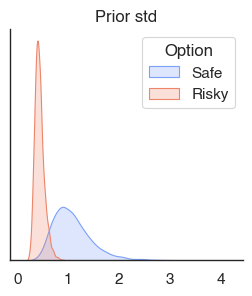

In [100]:
plot_subject('04')

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


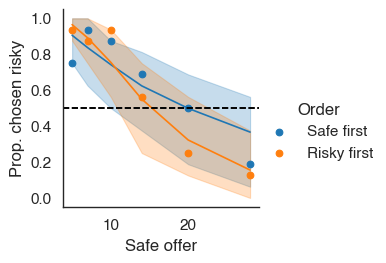

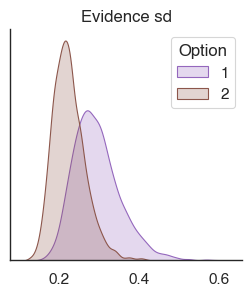

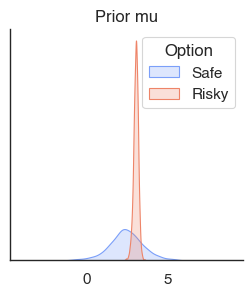

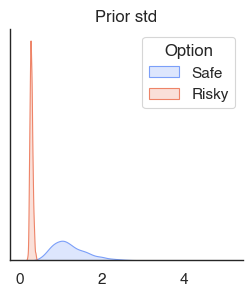

In [101]:
plot_subject(13)

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


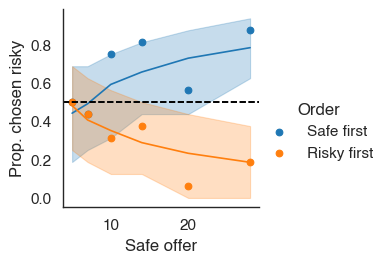

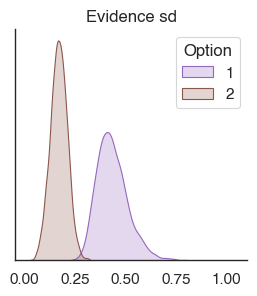

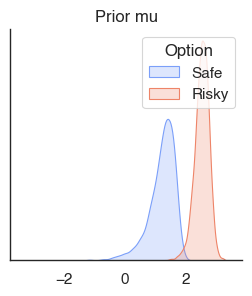

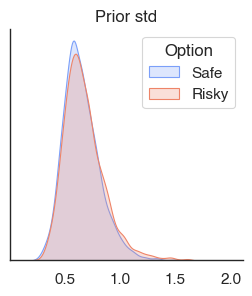

In [102]:
plot_subject(18)

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


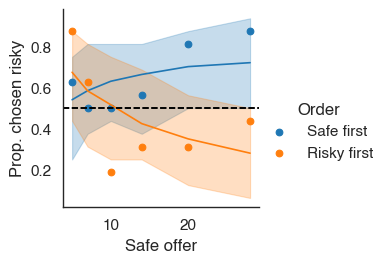

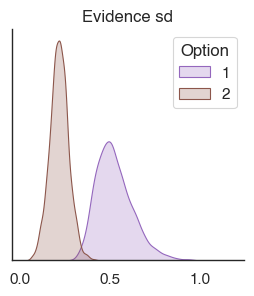

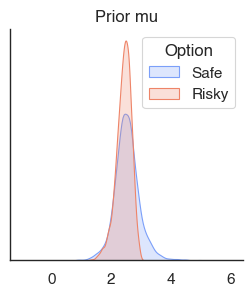

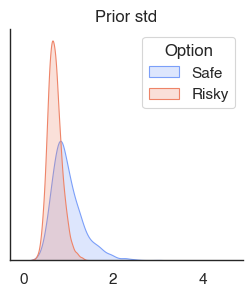

In [105]:
plot_subject(30)

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


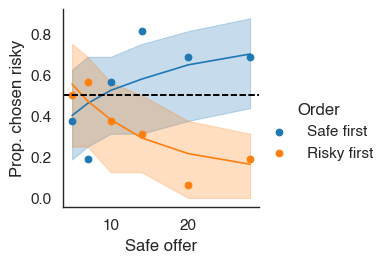

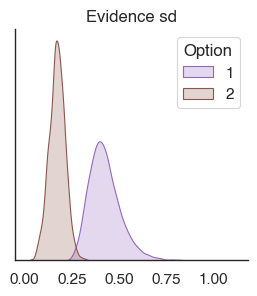

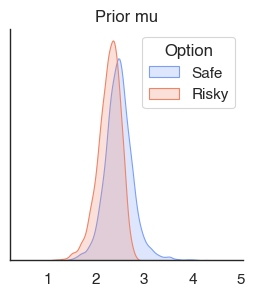

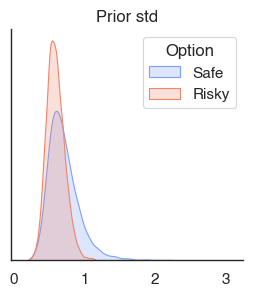

In [103]:
plot_subject(22)

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


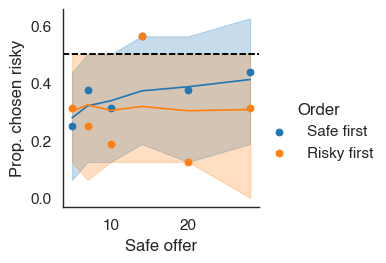

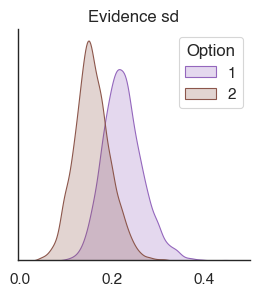

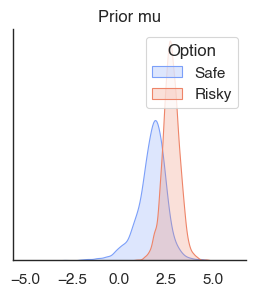

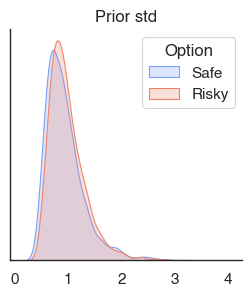

In [111]:
plot_subject(28)

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:234: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


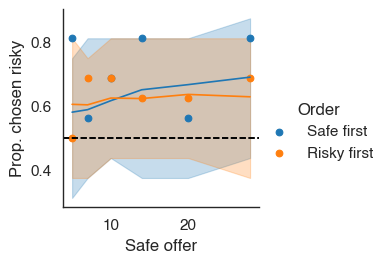

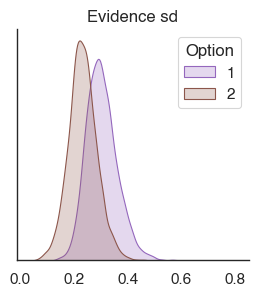

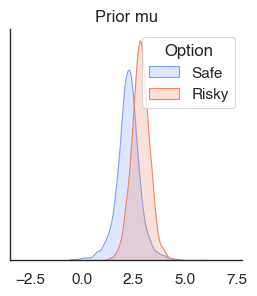

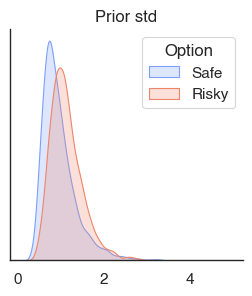

In [110]:
plot_subject('09')

In [112]:
np.log(df['n1'])

rt  uncertainty  z_uncertainty  \
subject run trial_nr                                         
02      1   1         1.544193          3.0       1.190537   
            2         0.890433          3.0       1.190537   
            3         1.707715          3.0       1.190537   
            4         0.689762          2.0      -0.101466   
            5         1.306945          2.0      -0.101466   
...                        ...          ...            ...   
32      8   188       0.574373          1.0      -0.535805   
            189       0.424887          2.0       1.856628   
            190       0.508297          1.0      -0.535805   
            191       0.508506          1.0      -0.535805   
            192       0.542275          2.0       1.856628   

                     median_split_uncertainty    n1    n2  prob1  prob2    p1  \
subject run trial_nr                                                            
02      1   1                high uncertainty  19.0  10.0   0.55    1.0  0.55   
            2                high uncertainty  98.0  28.0   0.55    1.0  0.55   
            3                high uncertainty  52.0  20.0   0.55    1.0  0.55   
            4                 low uncertainty  66.0  28.0   0.55    1.0  0.55   
            5                 low uncertainty  17.0  10.0   0.55    1.0  0.55   
...                                       ...   ...   ...    ...    ...   ...   
32      8   188               low uncertainty  26.0  10.0   0.55    1.0  0.55   
            189              high uncertainty  15.0   7.0   0.55    1.0  0.55   
            190               low uncertainty  34.0  28.0   0.55    1.0  0.55   
            191               low uncertainty  34.0  28.0   0.55    1.0  0.55   
            192              high uncertainty  28.0   7.0   0.55    1.0  0.55   

                       p2  ...  choice  risky_first  chose_risky        Order  \
subject run trial_nr       ...                                                  
02      1   1         1.0  ...    True         True        False  Risky first   
            2         1.0  ...   False         True         True  Risky first   
            3         1.0  ...   False         True         True  Risky first   
            4         1.0  ...   False         True         True  Risky first   
            5         1.0  ...   False         True         True  Risky first   
...                   ...  ...     ...          ...          ...          ...   
32      8   188       1.0  ...    True         True        False  Risky first   
            189       1.0  ...    True         True        False  Risky first   
            190       1.0  ...    True         True        False  Risky first   
            191       1.0  ...    True         True        False  Risky first   
            192       1.0  ...    True         True        False  Risky first   

                      n_risky  n_safe      frac  log(risky/safe)  \
subject run trial_nr                                               
02      1   1            19.0    10.0  1.900000         0.641854   
            2            98.0    28.0  3.500000         1.252763   
            3            52.0    20.0  2.600000         0.955511   
            4            66.0    28.0  2.357143         0.857450   
            5            17.0    10.0  1.700000         0.530628   
...                       ...     ...       ...              ...   
32      8   188          26.0    10.0  2.600000         0.955511   
            189          15.0     7.0  2.142857         0.762140   
            190          34.0    28.0  1.214286         0.194156   
            191          34.0    28.0  1.214286         0.194156   
            192          28.0     7.0  4.000000         1.386294   

                      bin(risky/safe)   log(n1)  
subject run trial_nr                             
02      1   1                       3  2.944439  
            2                       6  4.584967  
            3               